Loading and preparing data...

TRAINING LINEAR REGRESSION MODEL
Training the model...
Coefficients: [11.2094395   7.15561381  9.5208118 ]
Intercept: 67.35
Mean Squared Error: 512.86
R² Score: 0.8760
Mean Absolute Error: 16.72

TRAINING DEEP LEARNING MODEL
Building neural network...

Model Architecture:


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 64)             │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,481 (17.50 KB)

 Trainable params: 4,481 (17.50 KB)

 Non-trainable params: 0 (0.00 B)


Training the neural network...
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

Deep Learning Model Performance:
Mean Squared Error: 446.31
R² Score: 0.8921
Mean Absolute Error: 14.46

MODEL COMPARISON

Performance Comparison:
                     Metric  Linear Regression  Deep Learning
      MSE (Lower is better)         512.855137     446.310303
R² Score (Higher is better)           0.875971       0.892064
      MAE (Lower is better)          16.721594      14.457829

Deep Learning vs Linear Regression:
MSE Improvement: 12.98% (Better)
R² Improvement: 1.84% (Better)
MAE Improvement: 13.54% (Better)


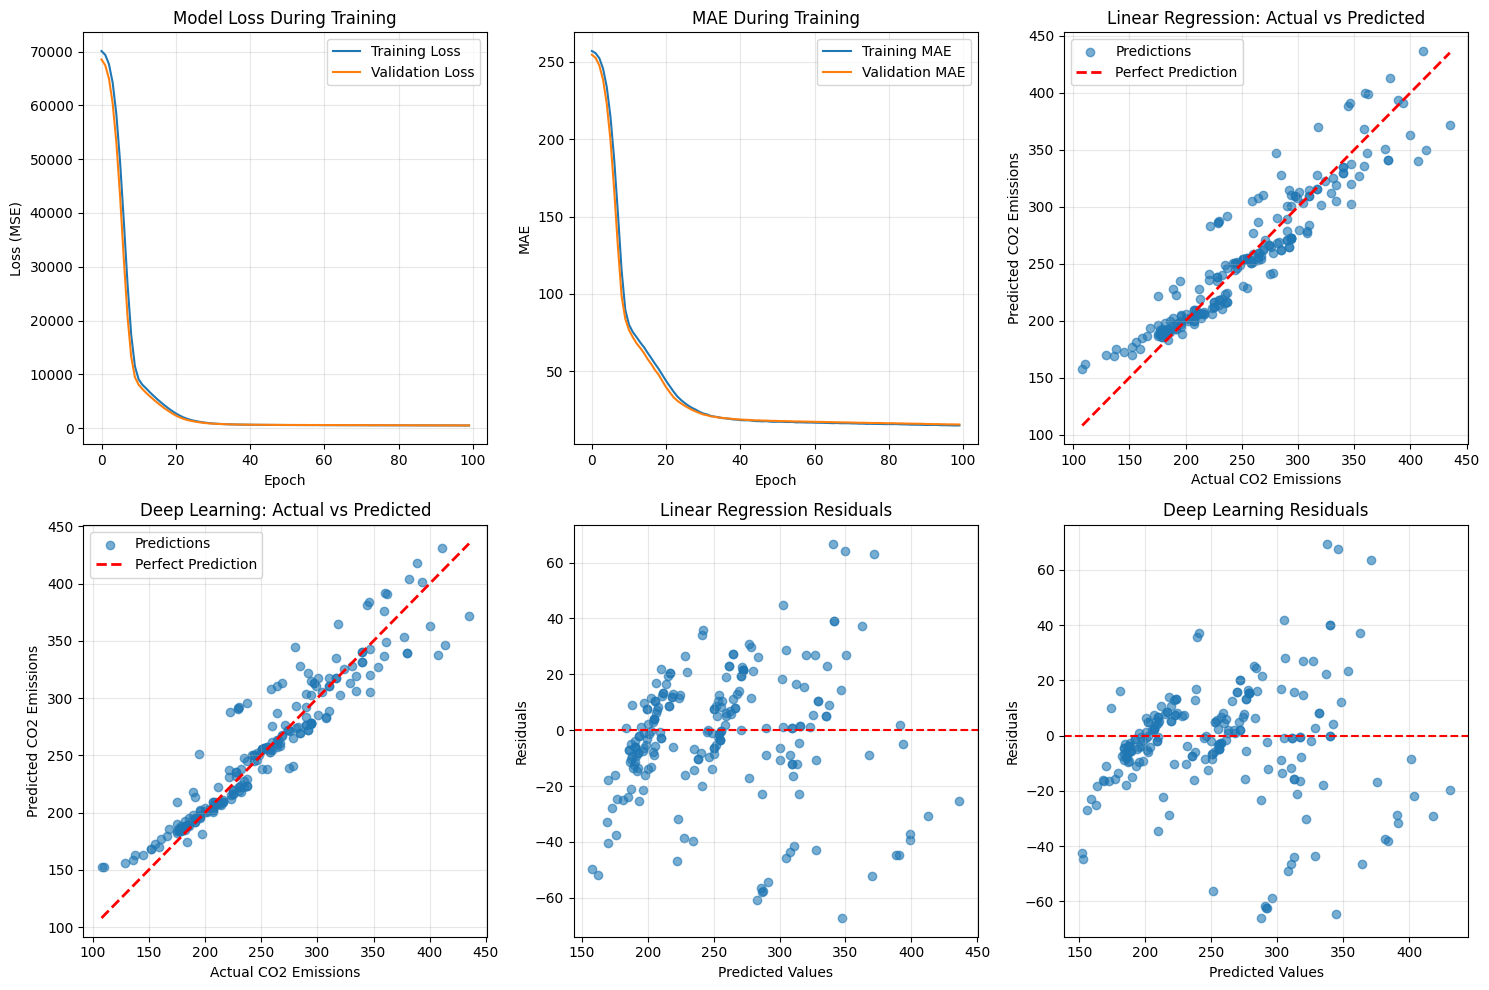


ADDITIONAL INSIGHTS

Linear Regression Feature Importance:
  ENGINESIZE: 11.2094
  CYLINDERS: 7.1556
  FUELCONSUMPTION_COMB: 9.5208

Error Distribution Statistics:
Linear Regression - Std of residuals: 22.58
Deep Learning - Std of residuals: 20.97

✅ Deep Learning model performs better on both MSE and R² metrics!


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load and prepare data
print("Loading and preparing data...")
df = pd.read_csv("FuelConsumption.csv")
data = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]

# Split feature data from target
X = data[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB']]
y = data['CO2EMISSIONS']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data for better neural network performance
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ============================
# 1. LINEAR REGRESSION MODEL
# ============================
print("\n" + "="*50)
print("TRAINING LINEAR REGRESSION MODEL")
print("="*50)

# Create and train the model
print("Training the model...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_lr = lr_model.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)

print(f'Coefficients: {lr_model.coef_}')
print(f'Intercept: {lr_model.intercept_:.2f}')
print(f'Mean Squared Error: {mse_lr:.2f}')
print(f'R² Score: {r2_lr:.4f}')
print(f'Mean Absolute Error: {mae_lr:.2f}')

# ============================
# 2. DEEP LEARNING MODEL
# ============================
print("\n" + "="*50)
print("TRAINING DEEP LEARNING MODEL")
print("="*50)

# Build the neural network
print("Building neural network...")
dl_model = keras.Sequential([
    layers.Input(shape=(3,)),  # Input layer for 3 features
    layers.Dense(64, activation='relu', name='hidden_layer_1'),
    layers.Dense(64, activation='relu', name='hidden_layer_2'),
    layers.Dense(1, name='output_layer')  # Linear activation for regression
])

# Compile the model
dl_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='mse',  # Mean Squared Error for regression
    metrics=['mae', 'mse']  # Track MAE and MSE during training
)

# Print model summary
print("\nModel Architecture:")
dl_model.summary()

# Train the model
print("\nTraining the neural network...")
history = dl_model.fit(
    X_train_scaled, y_train,
    validation_split=0.2,  # Use 20% of training data for validation
    epochs=100,
    batch_size=32,
    verbose=0  # Set to 1 to see training progress
)

# Make predictions
y_pred_dl = dl_model.predict(X_test_scaled).flatten()

# Evaluate the model
mse_dl = mean_squared_error(y_test, y_pred_dl)
r2_dl = r2_score(y_test, y_pred_dl)
mae_dl = mean_absolute_error(y_test, y_pred_dl)

print(f'\nDeep Learning Model Performance:')
print(f'Mean Squared Error: {mse_dl:.2f}')
print(f'R² Score: {r2_dl:.4f}')
print(f'Mean Absolute Error: {mae_dl:.2f}')

# ============================
# 3. MODEL COMPARISON
# ============================
print("\n" + "="*50)
print("MODEL COMPARISON")
print("="*50)

# Create comparison table
comparison = pd.DataFrame({
    'Metric': ['MSE (Lower is better)', 'R² Score (Higher is better)', 'MAE (Lower is better)'],
    'Linear Regression': [mse_lr, r2_lr, mae_lr],
    'Deep Learning': [mse_dl, r2_dl, mae_dl]
})

print("\nPerformance Comparison:")
print(comparison.to_string(index=False))

# Calculate improvement percentages
mse_improvement = ((mse_lr - mse_dl) / mse_lr) * 100
r2_improvement = ((r2_dl - r2_lr) / r2_lr) * 100 if r2_lr > 0 else 0
mae_improvement = ((mae_lr - mae_dl) / mae_lr) * 100

print(f"\nDeep Learning vs Linear Regression:")
print(f"MSE Improvement: {mse_improvement:.2f}% ({'Better' if mse_dl < mse_lr else 'Worse'})")
print(f"R² Improvement: {r2_improvement:.2f}% ({'Better' if r2_dl > r2_lr else 'Worse'})")
print(f"MAE Improvement: {mae_improvement:.2f}% ({'Better' if mae_dl < mae_lr else 'Worse'})")

# ============================
# 4. VISUALIZATION
# ============================
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Training history plots
axes[0, 0].plot(history.history['loss'], label='Training Loss')
axes[0, 0].plot(history.history['val_loss'], label='Validation Loss')
axes[0, 0].set_title('Model Loss During Training')
axes[0, 0].set_xlabel('Epoch')
axes[0, 0].set_ylabel('Loss (MSE)')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(history.history['mae'], label='Training MAE')
axes[0, 1].plot(history.history['val_mae'], label='Validation MAE')
axes[0, 1].set_title('MAE During Training')
axes[0, 1].set_xlabel('Epoch')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Predictions vs Actual (Linear Regression)
axes[0, 2].scatter(y_test, y_pred_lr, alpha=0.6, label='Predictions')
axes[0, 2].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[0, 2].set_title('Linear Regression: Actual vs Predicted')
axes[0, 2].set_xlabel('Actual CO2 Emissions')
axes[0, 2].set_ylabel('Predicted CO2 Emissions')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# Predictions vs Actual (Deep Learning)
axes[1, 0].scatter(y_test, y_pred_dl, alpha=0.6, label='Predictions')
axes[1, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axes[1, 0].set_title('Deep Learning: Actual vs Predicted')
axes[1, 0].set_xlabel('Actual CO2 Emissions')
axes[1, 0].set_ylabel('Predicted CO2 Emissions')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Residual plots
residuals_lr = y_test - y_pred_lr
residuals_dl = y_test - y_pred_dl

axes[1, 1].scatter(y_pred_lr, residuals_lr, alpha=0.6)
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_title('Linear Regression Residuals')
axes[1, 1].set_xlabel('Predicted Values')
axes[1, 1].set_ylabel('Residuals')
axes[1, 1].grid(True, alpha=0.3)

axes[1, 2].scatter(y_pred_dl, residuals_dl, alpha=0.6)
axes[1, 2].axhline(y=0, color='r', linestyle='--')
axes[1, 2].set_title('Deep Learning Residuals')
axes[1, 2].set_xlabel('Predicted Values')
axes[1, 2].set_ylabel('Residuals')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ============================
# 5. ADDITIONAL ANALYSIS
# ============================
print("\n" + "="*50)
print("ADDITIONAL INSIGHTS")
print("="*50)

# Feature importance for linear regression
print("\nLinear Regression Feature Importance:")
for feature, coef in zip(X.columns, lr_model.coef_):
    print(f"  {feature}: {coef:.4f}")

# Error distribution analysis
print(f"\nError Distribution Statistics:")
print(f"Linear Regression - Std of residuals: {np.std(residuals_lr):.2f}")
print(f"Deep Learning - Std of residuals: {np.std(residuals_dl):.2f}")

# Check which model performs better
if mse_dl < mse_lr and r2_dl > r2_lr:
    print("\n✅ Deep Learning model performs better on both MSE and R² metrics!")
elif mse_dl > mse_lr and r2_dl < r2_lr:
    print("\n✅ Linear Regression model performs better on both MSE and R² metrics!")
else:
    print("\n📊 Models show mixed performance - consider the specific metric most important for your use case.")